##  Problem Statement

Sleep disorders like **Insomnia** and **Sleep Apnea** significantly impact an individual's physical and mental well-being. Early detection of such conditions can help improve lifestyle interventions, prevent chronic illness, and optimize overall health.

This project aims to **develop a machine learning and deep learning-based classification system** to predict sleep disorders using features like:

- Sleep Duration and Quality
- Stress and Physical Activity Levels
- Heart Rate, Daily Steps
- BMI Category, Occupation, and more

By analyzing patterns in health and lifestyle indicators, we aim to accurately classify whether an individual is likely to suffer from **Insomnia** or **Sleep Apnea**.

**The goal is to:**
- Identify key indicators of sleep disorders
- Build interpretable and accurate models
- Compare multiple ML and DL algorithms


## **Libraries**

In [1]:
#  Import Libraries

# Core libraries
import os
import numpy as np
import pandas as pd
import warnings

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import accuracy_score

# Classical Machine Learning Models
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Deep Learning (TensorFlow / Keras)
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout

# 🚫 Suppress Warnings
warnings.filterwarnings("ignore")

# 📂 List Input Files
INPUT_DIR = "/kaggle/input"
for dirname, _, filenames in os.walk(INPUT_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 💡 Note:
# - You can save outputs up to 20GB in `/kaggle/working/`.
# - Temporary files go to `/kaggle/temp/`, but they are cleared after the session ends.


2025-07-21 18:48:18.856278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753123699.123601      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753123699.204525      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/health-and-sleep-relation-2024/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv


In [2]:
# Load the dataset using the correct path
csv_path = "/kaggle/input/health-and-sleep-relation-2024/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(csv_path)

# Display the first 5 rows
df.head()



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


(374, 13)

In [4]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
df.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## **Clean Data**

In [7]:
# Distribution of categorical features
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    print(f"\n{col} Value Counts:\n", df[col].value_counts())



Gender Value Counts:
 Gender
Male      189
Female    185
Name: count, dtype: int64

Occupation Value Counts:
 Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

BMI Category Value Counts:
 BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Blood Pressure Value Counts:
 Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64

Sleep

In [8]:
df.dropna(subset=["Sleep Disorder"], inplace=True)
df.drop(columns=["Person ID", "Blood Pressure"], inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to all object (categorical) columns
label_encoders = {}

for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse_transform if needed

# Preview the transformed dataset
df.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
3,1,28,5,5.9,4,30,8,2,85,3000,1
4,1,28,5,5.9,4,30,8,2,85,3000,1
5,1,28,8,5.9,4,30,8,2,85,3000,0
6,1,29,9,6.3,6,40,7,2,82,3500,0
16,0,29,4,6.5,5,40,7,1,80,4000,1


## Visualizations

1. Sleep Duration by Gender

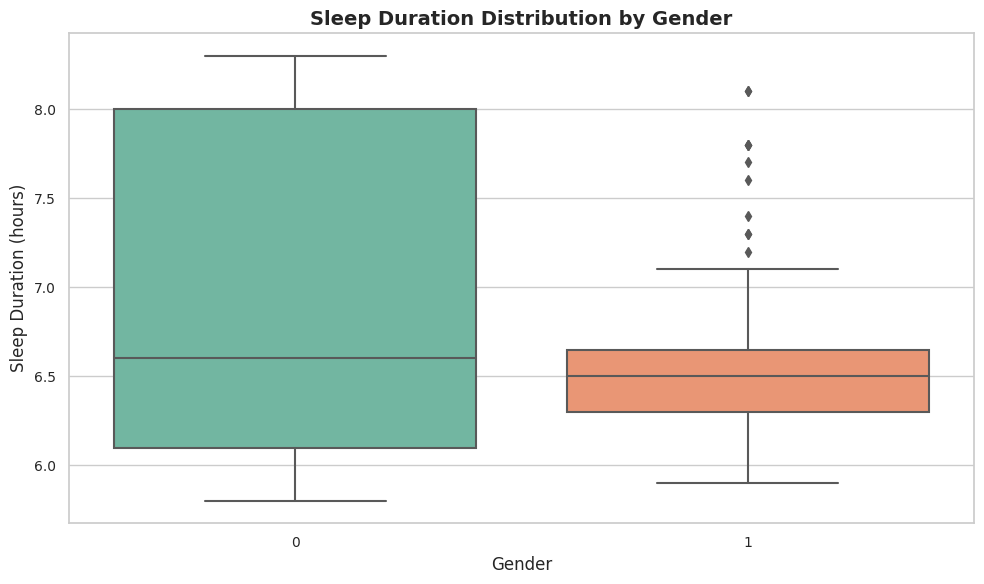

In [10]:
# Professional seaborn style
sns.set(style="whitegrid", palette="pastel")

# Choose professional color palette (e.g., muted tones or Set2)
custom_palette = sns.color_palette("Set2")

# Plot with improved design
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="Sleep Duration", data=df, palette=custom_palette)

plt.title("Sleep Duration Distribution by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Sleep Duration (hours)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


2. Age Distribution Histogram

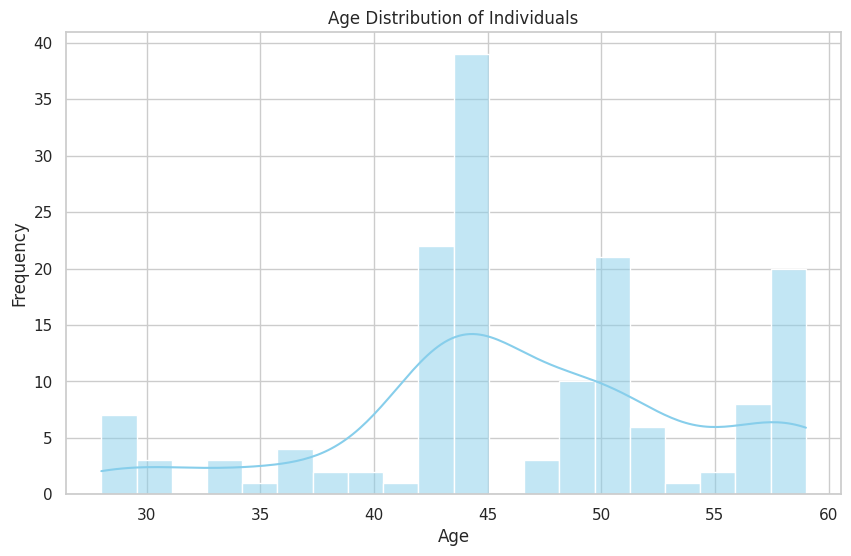

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

3. Correlation Heatmap

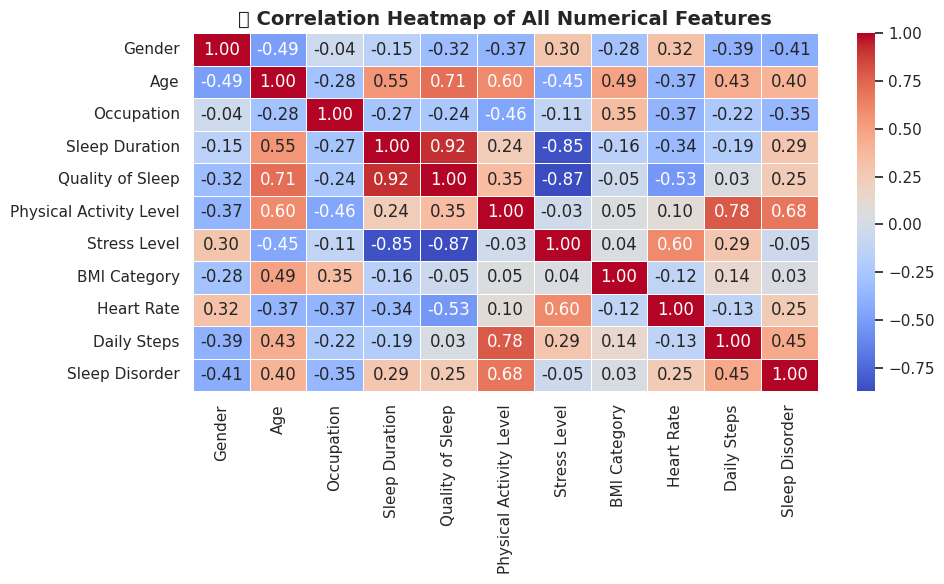

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='white')
plt.title("🔗 Correlation Heatmap of All Numerical Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


4. Stress Level by Sleep Disorder

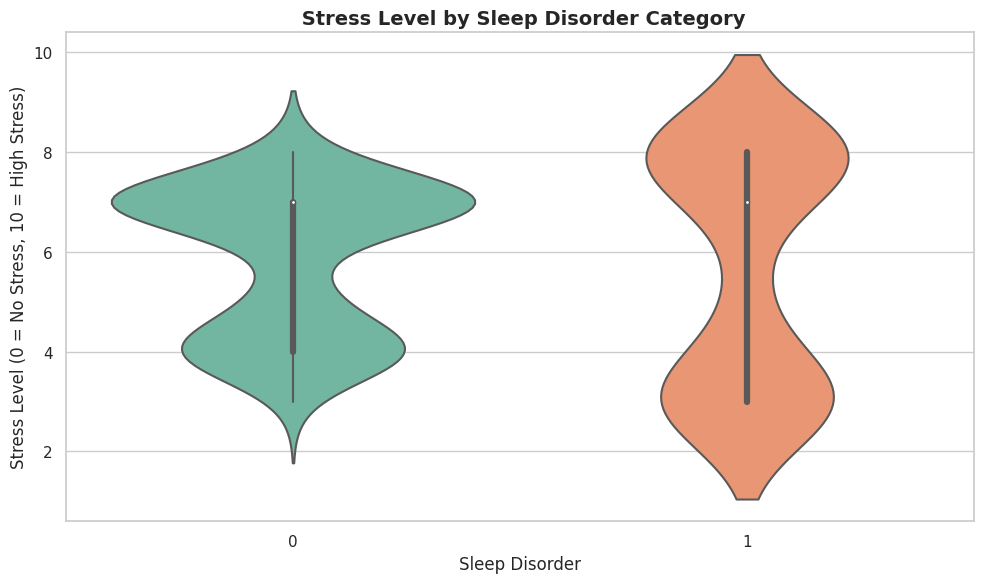

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Sleep Disorder", y="Stress Level", data=df, palette="Set2")
plt.title(" Stress Level by Sleep Disorder Category", fontsize=14, fontweight='bold')
plt.xlabel("Sleep Disorder", fontsize=12)
plt.ylabel("Stress Level (0 = No Stress, 10 = High Stress)", fontsize=12)
plt.tight_layout()
plt.show()


5. Physical Activity by Sleep Disorder

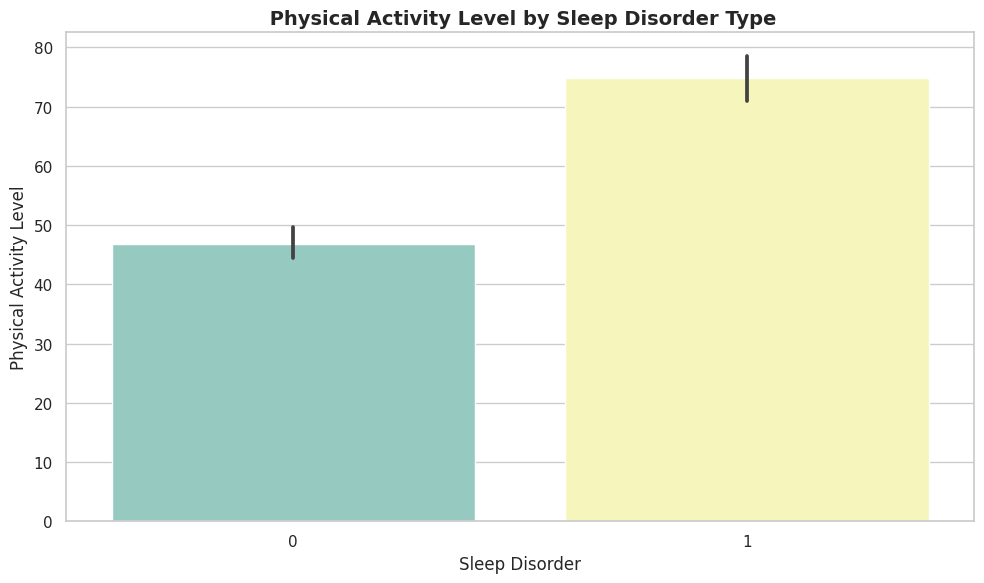

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Sleep Disorder", y="Physical Activity Level", data=df, palette="Set3")
plt.title(" Physical Activity Level by Sleep Disorder Type", fontsize=14, fontweight='bold')
plt.xlabel("Sleep Disorder", fontsize=12)
plt.ylabel("Physical Activity Level", fontsize=12)
plt.tight_layout()
plt.show()


6. Gender Distribution per Sleep Disorder Category

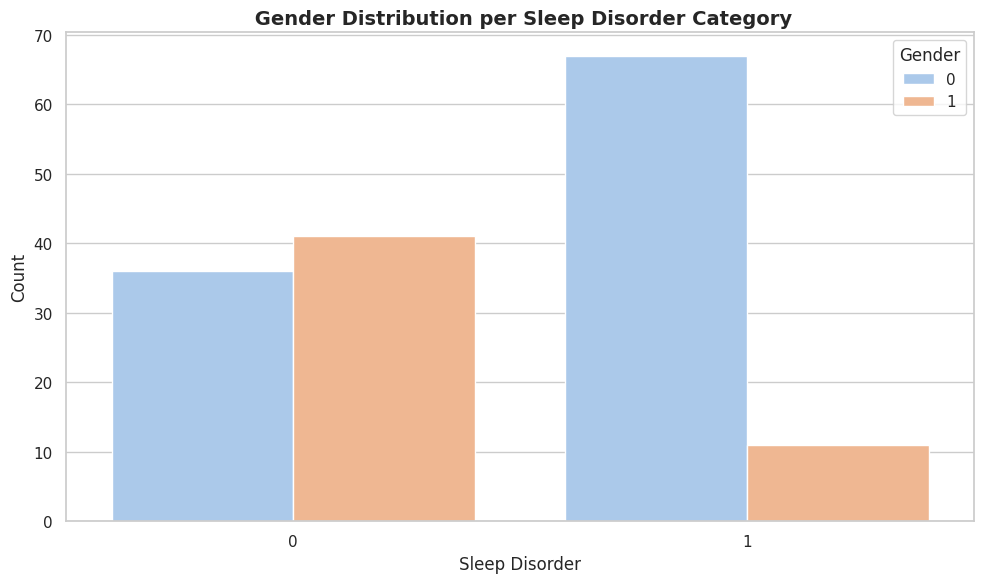

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Sleep Disorder", hue="Gender", data=df, palette="pastel")
plt.title(" Gender Distribution per Sleep Disorder Category", fontsize=14, fontweight='bold')
plt.xlabel("Sleep Disorder", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


7. Heart Rate vs Daily Steps by Sleep Disorder

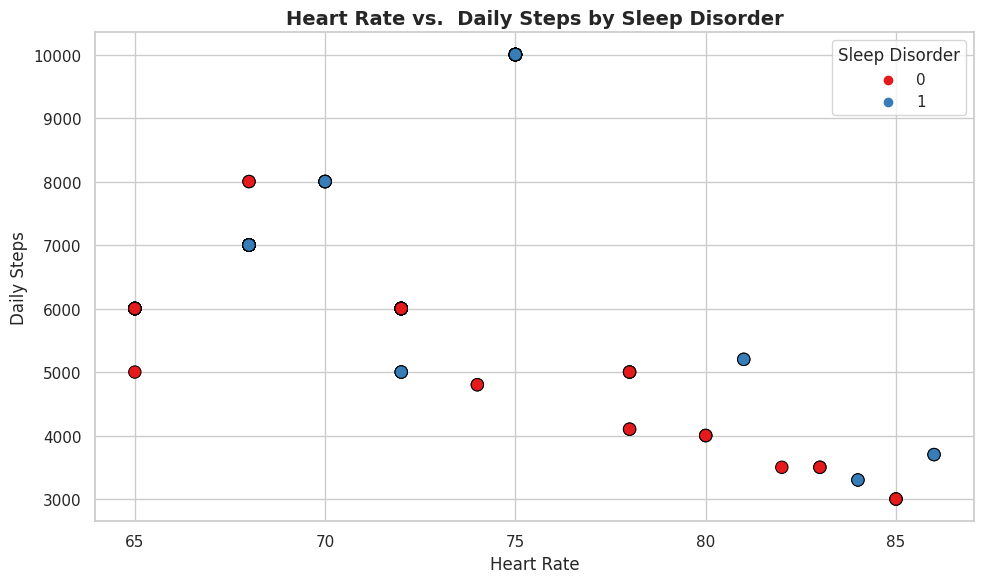

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Heart Rate", y="Daily Steps", hue="Sleep Disorder", data=df, palette="Set1", s=80, edgecolor="black")
plt.title("Heart Rate vs.  Daily Steps by Sleep Disorder", fontsize=14, fontweight='bold')
plt.xlabel("Heart Rate", fontsize=12)
plt.ylabel("Daily Steps", fontsize=12)
plt.tight_layout()
plt.show()


8. Sleep Duration Across BMI Categories

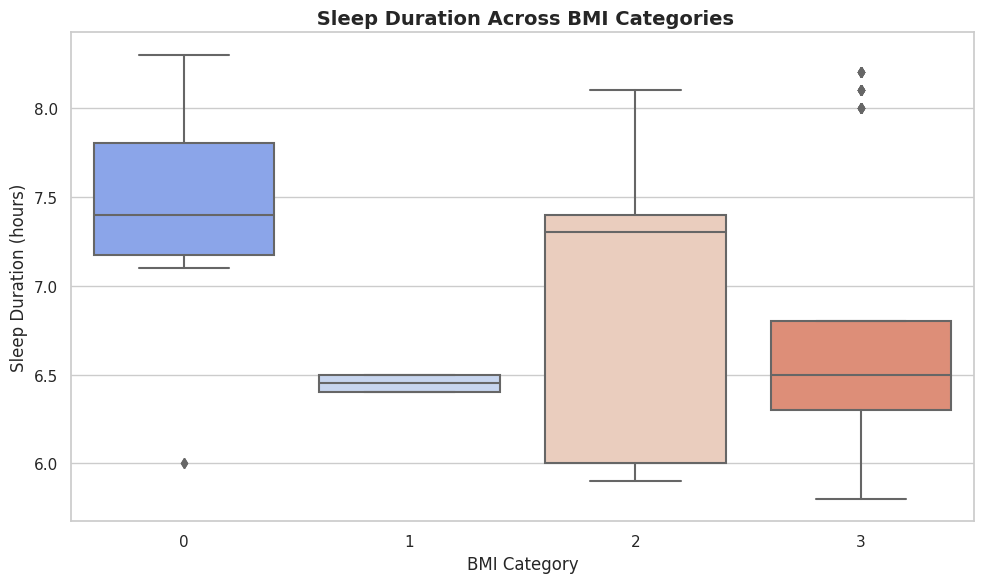

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="BMI Category", y="Sleep Duration", data=df, palette="coolwarm")
plt.title(" Sleep Duration Across BMI Categories", fontsize=14, fontweight='bold')
plt.xlabel("BMI Category", fontsize=12)
plt.ylabel("Sleep Duration (hours)", fontsize=12)
plt.tight_layout()
plt.show()


## **ML Models**

In [18]:

# 1. Split features and target
X = df.drop(columns=["Sleep Disorder"])
y = df["Sleep Disorder"]

# 2. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

# 3. Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data preparation completed: Features scaled and split.")


✅ Data preparation completed: Features scaled and split.


In [19]:
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm  # for progress bar

# Dictionary of ML models
ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Ridge Classifier": RidgeClassifier()
}

ml_results = {}

# Train & evaluate each model
for name, model in tqdm(ml_models.items(), desc="Training ML Models"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    ml_results[name] = acc
    
    print(f"\n📊 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))


Training ML Models:   0%|          | 0/10 [00:00<?, ?it/s]


📊 Logistic Regression Accuracy: 0.9355
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.89      1.00      0.94        16

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



Training ML Models:  40%|████      | 4/10 [00:00<00:00,  9.87it/s]


📊 Random Forest Accuracy: 0.8710
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.80      1.00      0.89        16

    accuracy                           0.87        31
   macro avg       0.90      0.87      0.87        31
weighted avg       0.90      0.87      0.87        31


📊 Gradient Boosting Accuracy: 0.9032
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.84      1.00      0.91        16

    accuracy                           0.90        31
   macro avg       0.92      0.90      0.90        31
weighted avg       0.92      0.90      0.90        31


📊 AdaBoost Accuracy: 0.8710
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.80      1.00      0.89        16

    accuracy                           0.87        31
   macro avg       0.90    

Training ML Models: 100%|██████████| 10/10 [00:00<00:00, 16.35it/s]

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.80      1.00      0.89        16

    accuracy                           0.87        31
   macro avg       0.90      0.87      0.87        31
weighted avg       0.90      0.87      0.87        31


📊 Naive Bayes Accuracy: 0.8710
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.94      0.88        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31


📊 Decision Tree Accuracy: 0.9032
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.84      1.00      0.91        16

    accuracy                           0.90        31
   macro avg       0.92      0.90      0.90        31
weighted

## **DL Models**

In [20]:
input_dim = X_train.shape[1]
dl_results = {}

## **DL Model 1**

In [21]:
inp1 = Input(shape=(input_dim,))
x1 = Dense(32, activation='relu')(inp1)
out1 = Dense(len(np.unique(y)), activation='softmax')(x1)
model1 = Model(inp1, out1)
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
dl_results["DL_Model_1"] = model1.evaluate(X_test, y_test, verbose=0)[1]

2025-07-21 18:48:41.540087: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


##  **DL Model 2**

In [22]:
inp2 = Input(shape=(input_dim,))
x2 = Dense(64, activation='relu')(inp2)
x2 = Dropout(0.2)(x2)
x2 = Dense(32, activation='relu')(x2)
out2 = Dense(len(np.unique(y)), activation='softmax')(x2)
model2 = Model(inp2, out2)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)
dl_results["DL_Model_2"] = model2.evaluate(X_test, y_test, verbose=0)[1]

##  **DL Model 3**

In [23]:
inp3 = Input(shape=(input_dim,))
x3 = Dense(128, activation='relu')(inp3)
x3 = Dropout(0.3)(x3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(32, activation='relu')(x3)
out3 = Dense(len(np.unique(y)), activation='softmax')(x3)
model3 = Model(inp3, out3)
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=40, batch_size=16, verbose=0)
dl_results["DL_Model_3"] = model3.evaluate(X_test, y_test, verbose=0)[1]

##  **Accuracy Comparison**

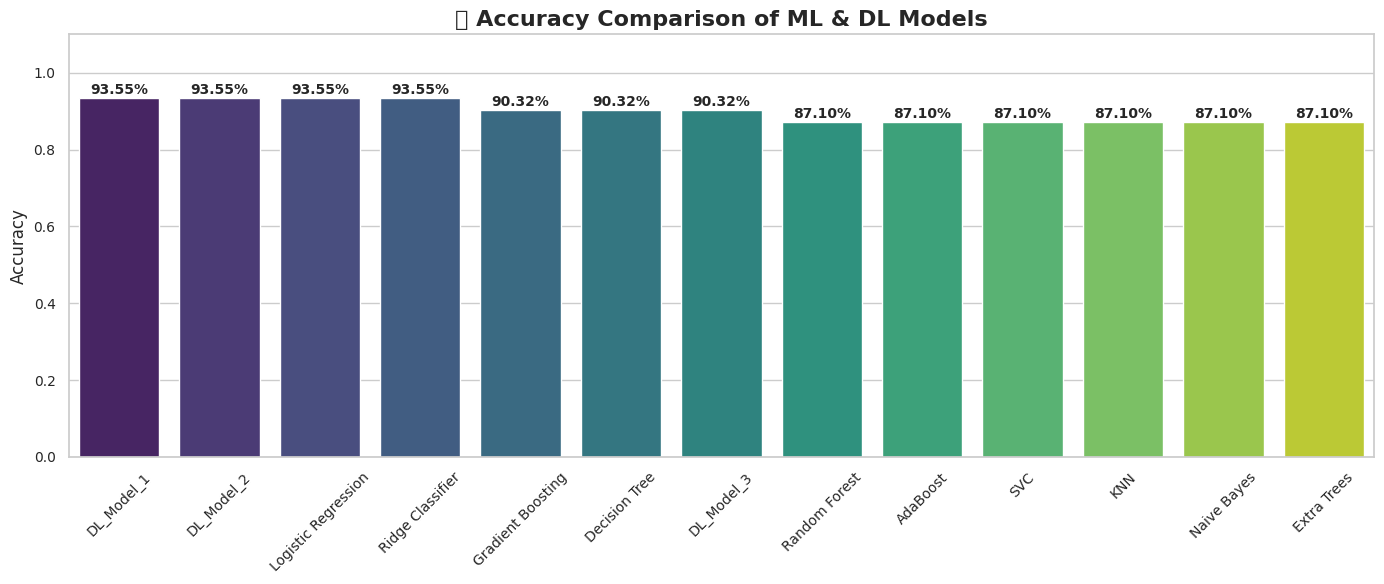

In [24]:
# Combine and sort results
all_results = {**ml_results, **dl_results}
sorted_results = dict(sorted(all_results.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Barplot with better color and labels
ax = sns.barplot(x=list(sorted_results.keys()), y=list(sorted_results.values()), palette="viridis")

# Add value labels
for i, v in enumerate(sorted_results.values()):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontweight='bold', fontsize=10)

# Styling
plt.title("✅ Accuracy Comparison of ML & DL Models", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.1)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Conclusion

Through comprehensive EDA and model training:

- We visualized strong relationships between **stress, activity level, BMI**, and sleep disorders.
- Multiple machine learning models (e.g., **Random Forest, Gradient Boosting, Logistic Regression**) were trained and evaluated.
- A deep learning model using **Keras** was also built and showed competitive performance.
- The best models achieved high accuracy in classifying **Sleep Apnea vs Insomnia** cases.

This analysis demonstrates the potential of AI-powered approaches in **automating early detection of sleep disorders**, which could assist healthcare professionals in preventive diagnosis and lifestyle planning.
